This looks at some selected fields in 1D plots from India_team_1.csv dataset.

For the 1D distributions in general, some look uniform, some look vaguely Gaussian, some look exponential / power law, others are a mixture.

Some trends from just considering the outliers (ie among the outliers):
- high urban density, wealth, greater digitalization, more education, higher banking involvement go together (eg Delhi, Chandigarh, and somewhat Goa)
- low urban density may be related to higher poverty
- Lakshadweep Islands and Andaman and Nicobar Islands show enough unusual behavior (with respect to outliers) and are low-populated enough that they are candidates for removal in further analysis (they could be studied on their own)

In [ ]:
# some analysis for one of the India team datasets, for DataKind datakit event
# (note a lot of the plot code construction details were courtesy queries to ChatGPT)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numbers

In [2]:
file_path = ""

In [3]:
df_main = pd.read_csv(file_path+"India_team_1.csv")

In [4]:
# create some calculated columns
    # MSME credit "normalized" per capita (not sure how ~useful this is; vs eg divide by state GDP?)
df_main['msme_percap_2019'] = df_main['msme_credit_amt_2019']/df_main['Pop_2019']  # not sure what units
df_main['msme_percap_2022'] = df_main['msme_credit_amt_2022']/df_main['Pop_2022']
df_main['nfs_app_per'] = df_main['nfs_app_vol']/df_main['Pop_2022']  # NFS payment app volume
df_main['shg_loans_per_2019'] = df_main['shg_loans_2019']/df_main['Pop_2019']  # female SHG loan amts
df_main['shg_loans_per_2021'] = df_main['shg_loans_2021']/df_main['Pop_2021']

In [5]:
df_main['mgnrega_per_2019'] = df_main['mgnrega_2019']/df_main['Pop_2019']
df_main['mgnrega_per_2022'] = df_main['mgnrega_2022']/df_main['Pop_2022']
df_main['senior_help_per_2019'] = df_main['senior_help_2019']/df_main['Pop_2019']
df_main['senior_help_per_2022'] = df_main['senior_help_2022']/df_main['Pop_2022']
df_main['pension_nps_per_2019'] = df_main['pension_nps_2019']/df_main['Pop_2019']
df_main['pension_nps_per_2022'] = df_main['pension_nps_2022']/df_main['Pop_2022']


In [6]:
df_main.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Columns: 304 entries, state_ut to pension_nps_per_2022
dtypes: float64(219), int64(84), object(1)
memory usage: 85.6+ KB


In [10]:
def plot_subframe_sorted_hst(df_in):
    
    # Create subplots (one row per column)
    fig, axes = plt.subplots(nrows=len(df_in.columns), ncols=2, figsize=(8, 2 * len(df_in.columns)), sharex=False)

    # If only one subplot, axes is not a list — make it iterable
    if len(df_in.columns) == 1:
        axes = [axes]

    # Plot each column's sorted values
    for ax, col in zip(axes, df_in):
        ax[0].hist(df_in[[col]].values)
        ax[0].set_title(f'{col}')
        sorted_vals = df_in[col].sort_values().values
        ax[1].plot(sorted_vals, marker='o')
        ax[1].set_title(f'{col} (sorted)')
        ax[1].grid(True)

    plt.tight_layout()
    plt.show()

In [12]:
# variant, to add histograms to sorted outlier plots
# for labeling, input dataframe requires 'state_ut' column
def plot_subframe_sorted_w_outliers_hst(df_in, outlier_y):
    
    num_plt = len(df_in.columns)-1
    
    if outlier_y is None:
        plot_subframe_sorted_hst(df_in.drop(columns=['state_ut']))
        return
    elif isinstance(outlier_y, numbers.Number):
        outlier_y = outlier_y*np.ones(num_plt)
    elif len(outlier_y)!=num_plt:
        print("outlier input must be 1 or number of plots")
        raise ValueError
    
    df_tmp = df_in.drop(columns=['state_ut'])
    # Create subplots (one row per column)
    fig, axes = plt.subplots(nrows=num_plt, ncols=2, figsize=(8, 2*num_plt), sharex=False)

    # If only one subplot, axes is not a list — make it iterable
    if num_plt == 1:
        axes = [axes]
        
    # Plot each column's sorted values
    ax_ct = 0
    for ax, col in zip(axes, df_tmp):
        ax[0].hist(df_in[[col]].values,bins=15)
        ax[0].set_title(f'{col}')
        df_sorted = df_in[['state_ut',col]].sort_values(by=[col])
        outliers = df_sorted[df_sorted[col] > outlier_y[ax_ct]]
        tmp_arr = np.array(df_sorted[col])
        out_ixs = np.array(range(len(tmp_arr)))[tmp_arr>outlier_y[ax_ct]]
        rw_ct = 0
        for _, row in outliers.iterrows():
            ax[1].text(out_ixs[rw_ct]+1.0, 0.95*row[col], row['state_ut'][:5], fontsize=9, ha='right', va='top', color='red', rotation=90)
            rw_ct += 1
        ax[1].plot(df_sorted[[col]].values, marker='o')
        ax[1].set_title(f'{col} (sorted)')
        ax[1].grid(True)
        ax_ct += 1
        print("outliers: %s" % str([df_sorted['state_ut'].values[ix] for ix in out_ixs]))  # optional

    plt.tight_layout()
    plt.show()

In [7]:
# population by state (in 1000s)
df_sub = df_main[['state_ut','Pop_2021']]
df_sub_srt = df_sub.sort_values(by=['Pop_2021'])
df_sub_srt

,state_ut,Pop_2021
18,Lakshadweep Islands,68
17,Ladakh,298
0,Andaman and Nicobar Islands,401
29,Sikkim,680
7,Dadra & Nagar Haveli and Daman & Diu,1132
5,Chandigarh,1215
23,Mizoram,1221
2,Arunachal Pradesh,1540
9,Goa,1563
26,Pondicherry,1593


# 1D plots

## Poverty

outliers: ['Meghalaya', 'Jharkhand', 'Bihar']
outliers: ['Uttar Pradesh', 'Bihar']
outliers: ['Meghalaya', 'Jharkhand', 'Bihar']


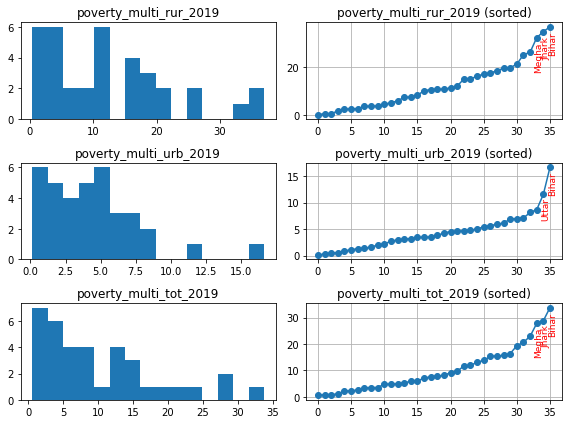

In [13]:
# this has Bihar as outlier in urban poverty, 2015 (highest in others), and all types in 2019;
# note that Bihar has the 2nd lowest urban density of all state/ut's;
# Jharkhand shows higher poverty, but almost outlier in 2015, and in 2019, it's high
# for rur and tot in 2019
#df_sub = df_main[['state_ut','poverty_multi_rur_2015', 'poverty_multi_urb_2015', 'poverty_multi_tot_2015']]
df_sub = df_main[['state_ut','poverty_multi_rur_2019', 'poverty_multi_urb_2019', 'poverty_multi_tot_2019']]
#plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[50.0,20.0,40.0])   # 2015
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[28.0,10,25.0]) # 2019


In [14]:
# 10 least impoverished states:
# how can Lakshadweep and A&N islands have (a) low poverty but (b) high unemployment?--
# internet search shows Lakshadweep indeed has low poverty index, but indeed has high
# unemployment (esp among youth, and w/ gender disparity)
df_tmp = df_main[['state_ut','poverty_multi_tot_2019']].sort_values(by='poverty_multi_tot_2019')
df_tmp.head(10)

,state_ut,poverty_multi_tot_2019
16,Kerala,0.55
9,Goa,0.84
26,Pondicherry,0.85
18,Lakshadweep Islands,1.11
30,Tamil Nadu,2.20
0,Andaman and Nicobar Islands,2.30
29,Sikkim,2.60
8,Delhi,3.43
5,Chandigarh,3.52
17,Ladakh,3.53


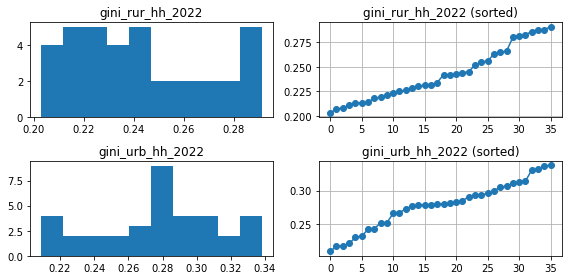

In [15]:
# intra-state Ginis
df_sub = df_main[['state_ut','gini_rur_hh_2022','gini_urb_hh_2022']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=None)

## Employment

outliers: ['Nagaland']
outliers: ['Lakshadweep Islands', 'Andaman and Nicobar Islands', 'Nagaland']
outliers: ['Nagaland']


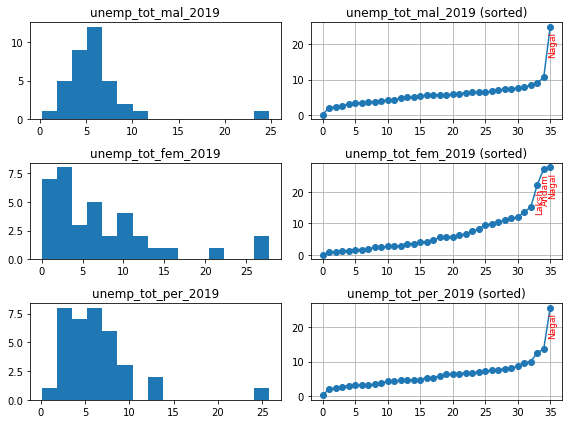

In [16]:
# this has Nagaland as a large outlier for all 2019 unemployment measures; A&N Islands and
# Lakshadweep Islands are high for female unemployment in 2019
df_sub = df_main[['state_ut','unemp_tot_mal_2019', 'unemp_tot_fem_2019', 'unemp_tot_per_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=20.0)

outliers: []
outliers: ['Andaman and Nicobar Islands']
outliers: []


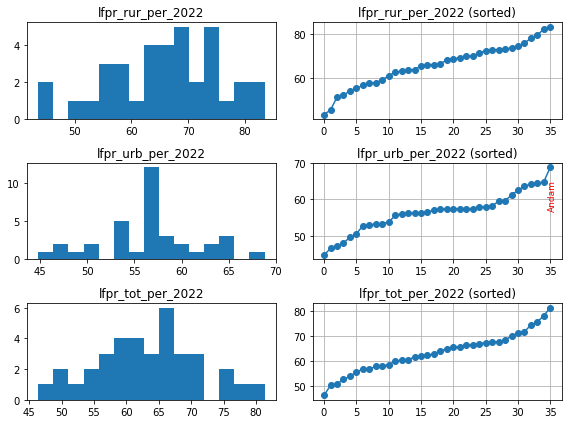

In [17]:
# labor force participation rate
df_sub = df_main[['state_ut','lfpr_rur_per_2022','lfpr_urb_per_2022','lfpr_tot_per_2022']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[100,67,100])


outliers: ['Kerala', 'Lakshadweep Islands']


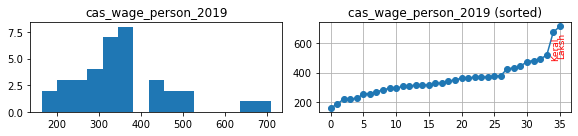

In [18]:
# casual wages
# this shows Lakshadweep Islands as having relatively high casual wages--maybe that helps
# explain the (a) low poverty but (b) high unemployment (esp if employment measure ignores
# casual work?)
df_sub = df_main[['state_ut','cas_wage_person_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=600)

outliers: ['Lakshadweep Islands']


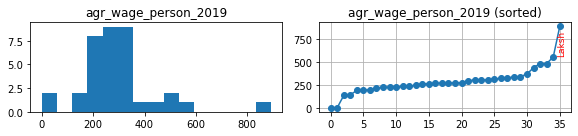

In [19]:
# agricultural wages
# again, Lakshadweep is an outlier, with relatively high wages for agriculture
df_sub = df_main[['state_ut','agr_wage_person_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=730)

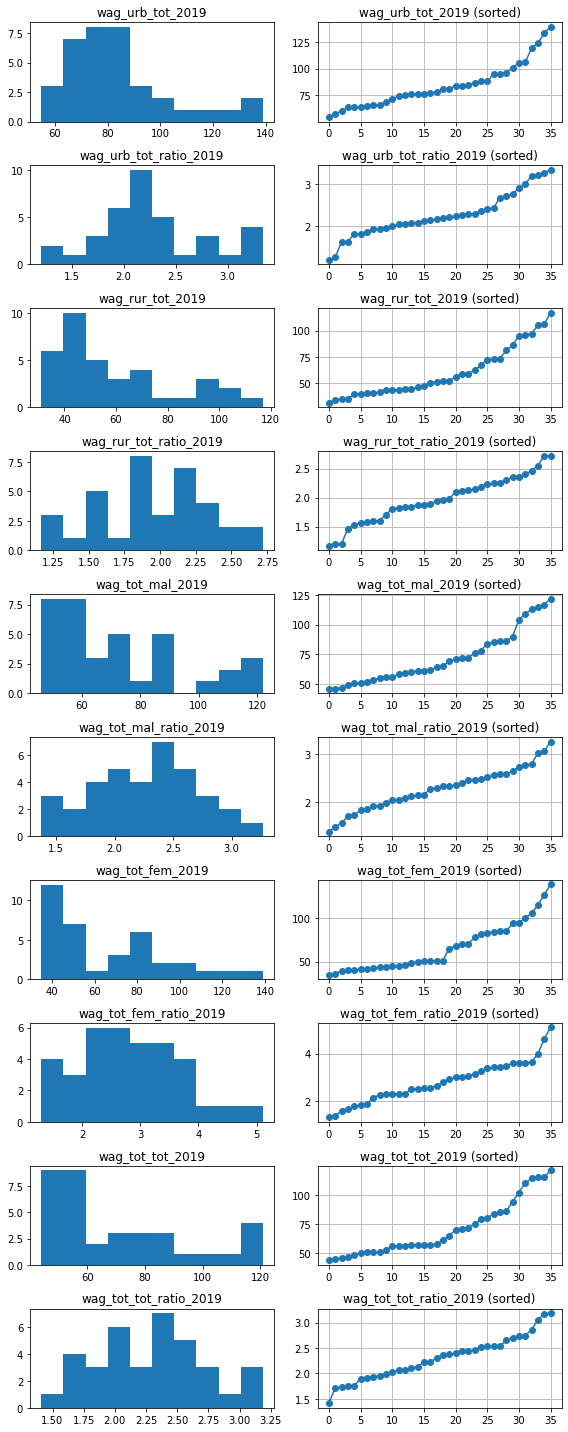

In [20]:
# general wages; names are urban/rural/total "_" male/female/total
# female and/or urban may show more curvature (vs straight lines), w/ increase at 
# higher values
df_sub = df_main[['state_ut','wag_urb_tot_2019', 'wag_urb_tot_ratio_2019', 'wag_rur_tot_2019', 'wag_rur_tot_ratio_2019', 'wag_tot_mal_2019', 'wag_tot_mal_ratio_2019', 'wag_tot_fem_2019', 'wag_tot_fem_ratio_2019', 'wag_tot_tot_2019', 'wag_tot_tot_ratio_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=None)

outliers: ['Ladakh', 'Pondicherry', 'Punjab', 'Andhra Pradesh', 'Mizoram', 'Sikkim', 'Meghalaya']


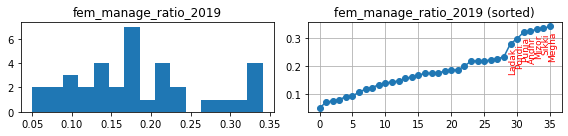

In [22]:
# female managers ratio
# again, this shows an increase at higher values--maybe this is related to general wages
# bump at high end in general wages plots?
df_sub = df_main[['state_ut','fem_manage_ratio_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=0.24)

outliers: ['Assam']
outliers: ['Bihar']
outliers: ['Mizoram']
outliers: ['Chandigarh', 'Mizoram']
outliers: ['Goa', 'Meghalaya', 'Arunachal Pradesh', 'Tripura', 'Dadra & Nagar Haveli and Daman & Diu', 'Nagaland', 'Assam', 'Sikkim']
outliers: ['Assam', 'Dadra & Nagar Haveli and Daman & Diu', 'Bihar']
outliers: ['Mizoram']
outliers: ['Mizoram']


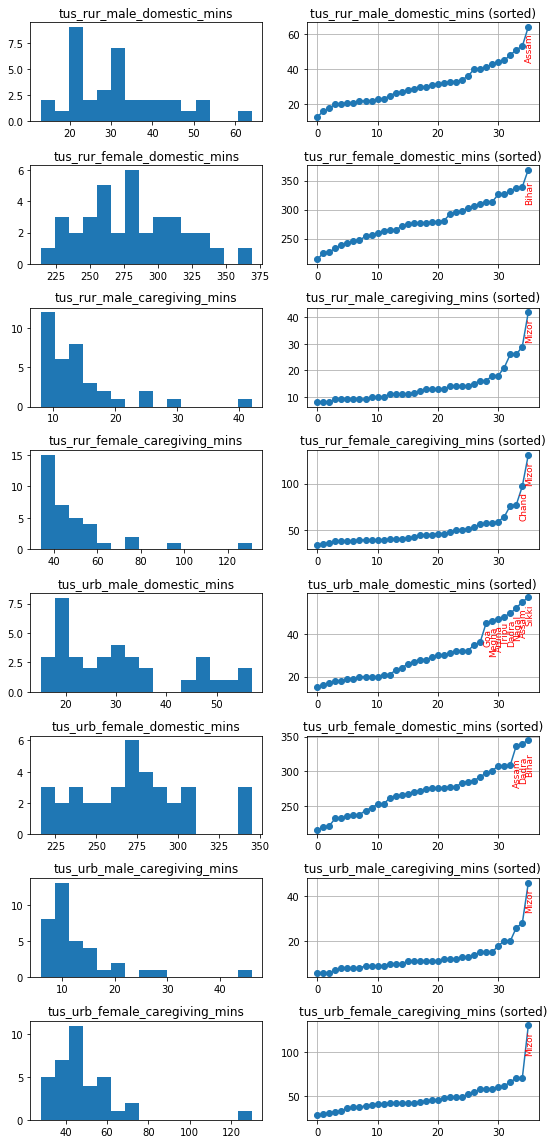

In [23]:
# time use survey, unpaid help re domestic and caregiving
# some of these look a bit quadratic; Mizoram is a consistent outlier;
# note also Bihar, which was ~outlier in poverty measures also shows up here
# as moderate outlier, with high female unpaid domestic work minutes
df_sub = df_main[['state_ut','tus_rur_male_domestic_mins', 'tus_rur_female_domestic_mins', 'tus_rur_male_caregiving_mins', 'tus_rur_female_caregiving_mins', 'tus_urb_male_domestic_mins', 'tus_urb_female_domestic_mins', 'tus_urb_male_caregiving_mins', 'tus_urb_female_caregiving_mins']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[59,350,35,90,40,325,40,100])

## Social programs

outliers: []
outliers: []
outliers: ['Manipur']
outliers: ['Chandigarh', 'Lakshadweep Islands', 'Goa', 'Andaman and Nicobar Islands', 'Sikkim']


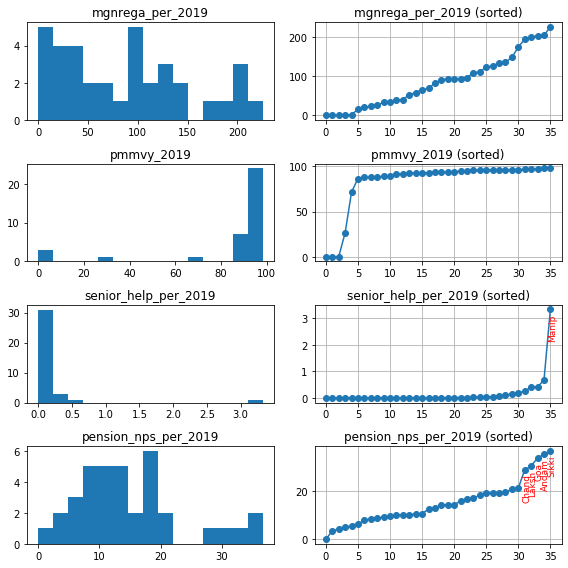

In [24]:
# social programs
# pmmvy starts very low, I think because some states had 0 instances of this program 
# in the data; the most notable outlier is for senior_help_per_2019,
# in Manipur--not sure why such high outlier
df_sub = df_main[['state_ut','mgnrega_per_2019','pmmvy_2019','senior_help_per_2019','pension_nps_per_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[300,200,2,25])


In [120]:
df_sub = df_main[['state_ut','pmmvy_2019']]
df_sub_srt = df_sub.sort_values(by=['pmmvy_2019'])
df_sub_srt.head()

,state_ut,pmmvy_2019
18,Odisha,0.00
33,Ladakh,0.00
23,Telangana,0.00
34,Lakshadweep Islands,26.41
27,West Bengal,71.57


## Banking and related

outliers: []
outliers: []
outliers: []
outliers: ['Goa', 'Chandigarh']
outliers: ['Ladakh']
outliers: ['Karnataka', 'Telangana', 'Andhra Pradesh']
outliers: ['Andhra Pradesh', 'Chandigarh']
outliers: ['Delhi', 'Chandigarh']


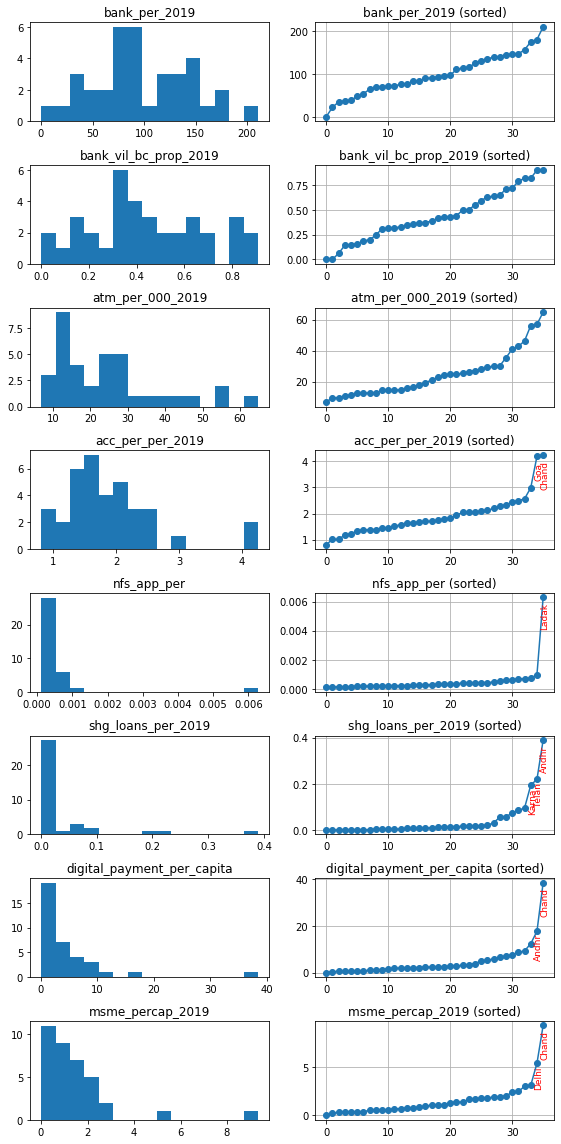

In [25]:
# banking measures
# for these banking measures, Chandigarh has high measures for digital payments and
# accounts per person and MSME per cap; Dehli has a high MSME presence / assistance
# per capita;
# note that Chandigarh, Goa, and Delhi (outliers here) are all in the 9 least 
# impoverished states; 
# Ladakh has very high per person NFS app volumes
df_sub = df_main[['state_ut','bank_per_2019','bank_vil_bc_prop_2019','atm_per_000_2019','acc_per_per_2019','nfs_app_per','shg_loans_per_2019','digital_payment_per_capita','msme_percap_2019']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[250,1.5,70,3.5,0.004,0.15,17.5,5])


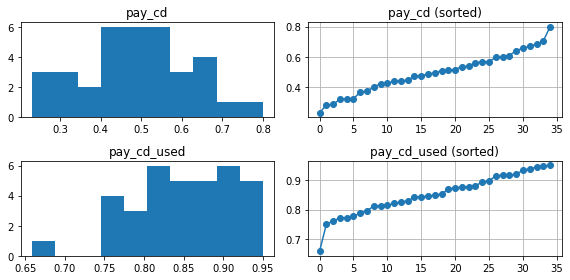

In [58]:
# credit card (2019)
# Chattisgarh is somewhat of a low outlier for credit card use within past 365 days
df_sub = df_main[['state_ut','pay_cd','pay_cd_used']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=None)


In [59]:
df_sub = df_main[['state_ut','pay_cd_used']]
df_sub_srt = df_sub.sort_values(by=['pay_cd_used'])
df_sub_srt.head(3)

,state_ut,pay_cd_used
6,Chattisgarh,0.658811
22,Meghalaya,0.749891
14,Jharkhand,0.762391


outliers: ['Andaman and Nicobar Islands']
outliers: ['Himachal Pradesh']
outliers: ['Pondicherry']
outliers: ['Telangana', 'Kerala', 'Manipur']


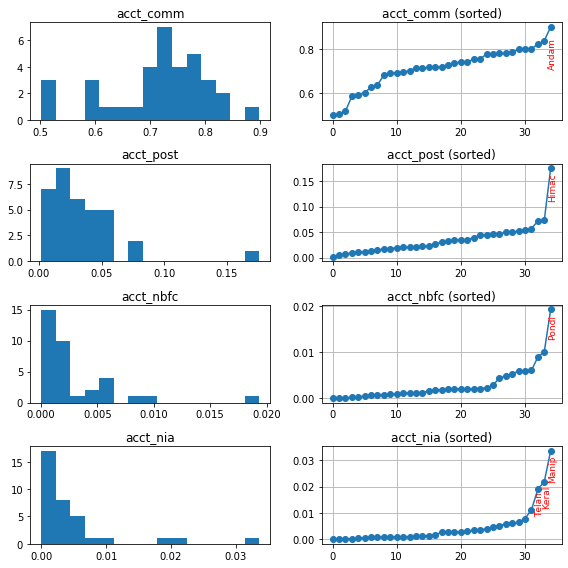

In [61]:
# account ownership, various types (2019)
# these have various high outliers, depending on account type; some may be due to
# rural/urban density (Himachal Pradesh has the lowest urban density)
df_sub = df_main[['state_ut','acct_comm', 'acct_post', 'acct_nbfc', 'acct_nia']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=[0.84,0.10,0.012,0.015])

outliers: ['Lakshadweep Islands']


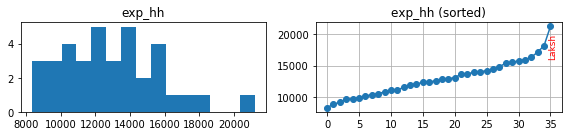

In [67]:
# household expenditures (HCES 2022)
# Lakshaweep Islands are a mild outlier
df_sub = df_main[['state_ut','exp_hh']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=19000)

## Education

outliers: []
outliers: ['Himachal Pradesh', 'Delhi']


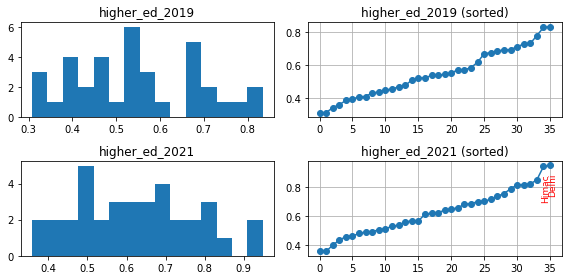

In [68]:
# education
df_sub = df_main[['state_ut','higher_ed_2019', 'higher_ed_2021']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=0.90)

outliers: ['Rajasthan', 'Chandigarh']


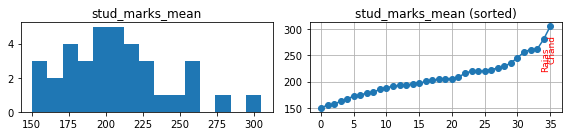

In [70]:
df_sub = df_main[['state_ut','stud_marks_mean']]  # 2021
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=265)

## Digitalization

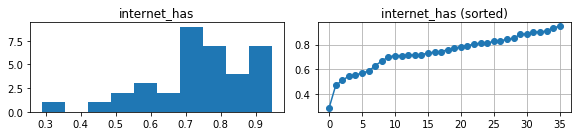

In [71]:
# has internet (2022 HCES)
# Uttarakhand is a low outlier
df_sub = df_main[['state_ut','internet_has']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=None)

In [72]:
df_sub = df_main[['state_ut','internet_has']]
df_sub_srt = df_sub.sort_values(by=['internet_has'])
df_sub_srt.head(3)

,state_ut,internet_has
34,Uttarakhand,0.289217
25,Odisha,0.470114
2,Arunachal Pradesh,0.510570


<ipython-input-73-7b878cf6f0a6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['avg_op'] = df_sub.iloc[:,1:].mean(axis=1)


outliers: ['Delhi']


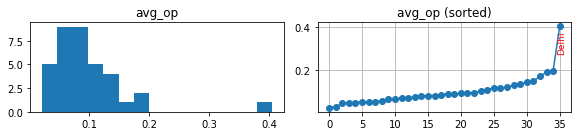

In [73]:
# online purchases (2022 HCES)
# here, Delhi is a marked outlier--maybe dense urban environment?
df_sub = df_main[['state_ut','op_fuel', 'op_cons', 'op_educ', 'op_meds', 'op_other']]
df_sub['avg_op'] = df_sub.iloc[:,1:].mean(axis=1)
df_sub = df_sub[['state_ut','avg_op']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=0.3)

## Msc

outliers: ['Lakshadweep Islands', 'Delhi', 'Chandigarh']


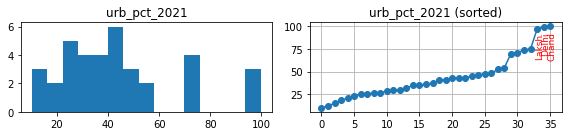

In [26]:
# urban density;
# note that Delhi and Chandigarh score low on poverty metrics, and had highish banking
# rates, as well
df_sub = df_main[['state_ut','urb_pct_2021']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=78.0)

In [62]:
df_sub = df_main[['state_ut','urb_pct_2021']]
df_sub_srt = df_sub.sort_values(by=['urb_pct_2021'])
df_sub_srt.head(10)

,state_ut,urb_pct_2021
12,Himachal Pradesh,10.3
4,Bihar,12.1
3,Assam,15.3
25,Odisha,18.5
22,Meghalaya,20.6
33,Uttar Pradesh,23.7
2,Arunachal Pradesh,25.2
14,Jharkhand,25.8
28,Rajasthan,26.3
6,Chattisgarh,26.5


In [64]:
df_sub_srt.tail(10)

,state_ut,urb_pct_2021
20,Maharashtra,48.00000
30,Tamil Nadu,52.80000
23,Mizoram,54.50000
26,Pondicherry,69.90000
16,Kerala,71.00000
9,Goa,73.70000
7,Dadra & Nagar Haveli and Daman & Diu,75.01502
18,Lakshadweep Islands,96.80000
8,Delhi,99.40000
5,Chandigarh,99.70000


In [75]:
# look at one correlation here--are poverty and urban density correlated?
# there is a moderate negative correlation (higher urban density <=> lower poverty)
df_main[['urb_pct_2021','poverty_multi_tot_2019']].corr()

,urb_pct_2021,poverty_multi_tot_2019
urb_pct_2021,1.000000,-0.618784
poverty_multi_tot_2019,-0.618784,1.000000


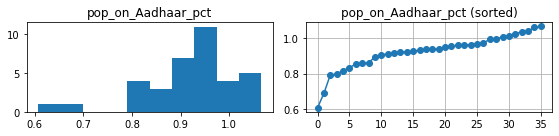

In [28]:
# Aadhaar
# this sees two low outliers, Nagaland and Meghalaya
df_sub = df_main[['state_ut','pop_on_Aadhaar_pct']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=None)

In [29]:
df_sub = df_main[['state_ut','pop_on_Aadhaar_pct']]
df_sub_srt = df_sub.sort_values(by=['pop_on_Aadhaar_pct'])
df_sub_srt.head()

,state_ut,pop_on_Aadhaar_pct
24,Nagaland,0.607181
22,Meghalaya,0.688152
2,Arunachal Pradesh,0.792417
17,Ladakh,0.796320
21,Manipur,0.817078


<ipython-input-57-1ccc436f7de8>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sub['su_sample_per_cap'] = df_sub.iloc[:,2:].sum(axis=1)/df_sub['Pop_2022']


outliers: ['Chandigarh', 'Delhi']


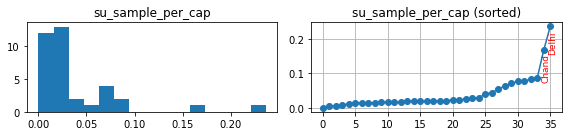

In [57]:
# entreprenneurship (subset of su_ columns);
# again, Delhi (and Chandigarh) come up as outliers--relatively wealthy, an relatively
# densely urban
df_sub = df_main[['state_ut','Pop_2022','su_fintech', 'su_telecom', 'su_energy', 'su_media', 'su_healthcare', 'su_greentech', 'su_agri', 'su_biotech', 'su_chem', 'su_educ']]
df_sub['su_sample_per_cap'] = df_sub.iloc[:,2:].sum(axis=1)/df_sub['Pop_2022']
df_sub = df_sub[['state_ut','su_sample_per_cap']]
plot_subframe_sorted_w_outliers_hst(df_sub, outlier_y=0.11)